C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.


Single Feature Model (RM): MSE=46.14, MAE=4.48, RMSE=6.79, R²=0.37

Multiple Linear Regression Model: MSE=24.29, MAE=3.19, RMSE=4.93, R²=0.67


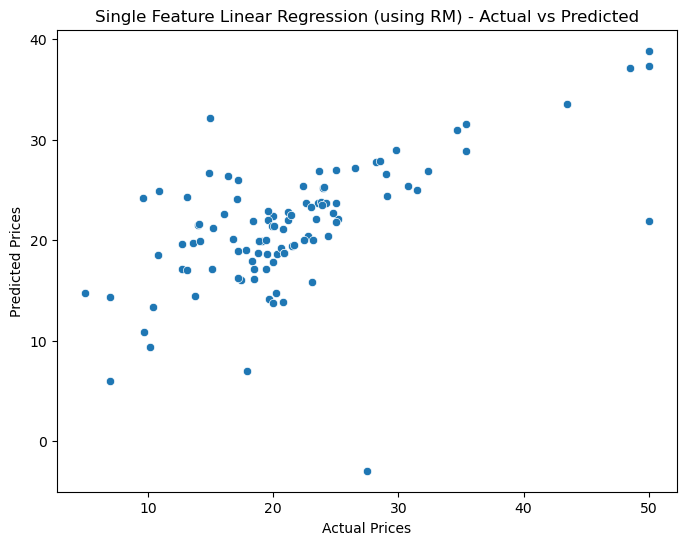

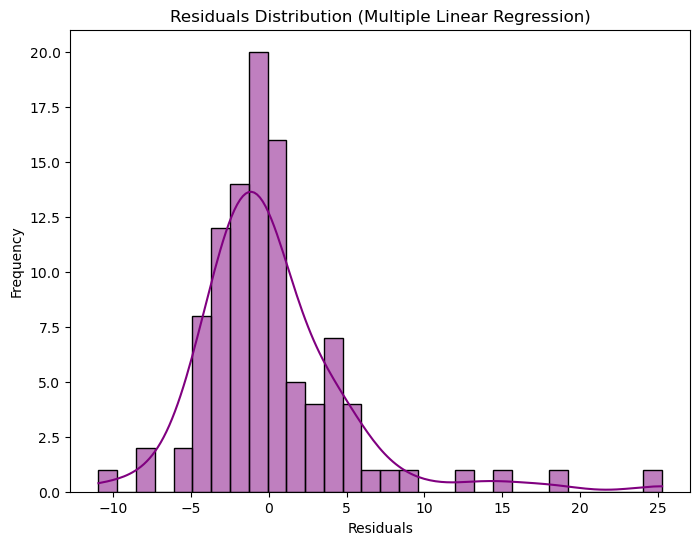

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target  
X, y = df.drop(columns=['PRICE']), df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(df[['RM']], y, test_size=0.2, random_state=42)

model_single = LinearRegression().fit(X_single_train, y_single_train)
model_multi = LinearRegression().fit(X_train, y_train)

y_pred_single = model_single.predict(X_single_test)
y_pred_multi = model_multi.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

mse_single, mae_single, rmse_single, r2_single = evaluate_model(y_single_test, y_pred_single)

mse_multi, mae_multi, rmse_multi, r2_multi = evaluate_model(y_test, y_pred_multi)

print(f"\nSingle Feature Model (RM): MSE={mse_single:.2f}, MAE={mae_single:.2f}, RMSE={rmse_single:.2f}, R²={r2_single:.2f}")
print(f"\nMultiple Linear Regression Model: MSE={mse_multi:.2f}, MAE={mae_multi:.2f}, RMSE={rmse_multi:.2f}, R²={r2_multi:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_single_test, y=y_pred_single)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Single Feature Linear Regression (using RM) - Actual vs Predicted")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_multi, bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Multiple Linear Regression)")
plt.show()